---
title: Time resolution effect
abstract: To understand if the difference of Juno distribution at 1AU and beyond is due to time resolution, i.e. it's possile that 1s is sufficient to resolve distribution at r>1.5AU, but insufficient at 1AU. To check this we may compare ARTEMIS data at 1AU for two resolutions - 1s and 1/5s
---

In [1]:
from ids_finder.utils.basic import load_params
from ids_finder.utils.basic import load_catalog

import polars as pl

from beforerr.r import py2rpy_polars
import rpy2.robjects as robjects

In [2]:
#| hide
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

r = robjects.r
r.source('utils.R')

conv_pl = py2rpy_polars()

[01/08/24 11:11:19] WARNING  R[write to console]:                                                  ]8;id=736919;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=259413;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\
                             Attaching package: ‘dplyr’                                                            
                                                                                                                   
                                                                                                                   

                    WARNING  R[write to console]: The following objects are masked from            ]8;id=961810;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=309670;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\
                             ‘package:stats’:                                                                      
                                                                                                                   
                                 filter, lag                                                                       
                                                                                                                   
                                                                                                                   

                    WARNING  R[write to console]: The following objects are masked from            ]8;id=597454;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=244788;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\
                             ‘package:base’:                                                                       
                                                                                                                   
                                 intersect, setdiff, setequal, union                                               
                                                                                                                   
                                                                                                                   

In [3]:
params = load_params()
catalog = load_catalog()

[01/08/24 11:11:19] WARNING  /Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/ ]8;id=65415;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=985335;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/warnings.py#109\109]8;;\
                             kedro_datasets/polars/lazy_polars_dataset.py:14:                                      
                             KedroDeprecationWarning: 'AbstractVersionedDataSet' has been renamed                  
                             to 'AbstractVersionedDataset', and the alias will be removed in Kedro                 
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

In [4]:
wind_ts_low_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_1s_tau_60s')
wind_ts_high_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_0.09s_tau_60s')
wind_ts_01_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_0.1s_tau_60s')
wind_ts_02_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_0.2s_tau_60s')
wind_ts_05_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_0.5s_tau_60s')
juno_ts_low_all: pl.LazyFrame = catalog.load('events.l1.JNO_ts_1s_tau_60s')

time_filter = pl.col('time').dt.year()==2016

wind_ts_low = wind_ts_low_all.filter(time_filter).with_columns(
    ts = pl.lit('1s'),
    sat = pl.lit('Wind')
)
wind_ts_high = wind_ts_high_all.filter(time_filter).with_columns(
    ts = pl.lit('0.09s'),
    sat = pl.lit('Wind')
)

wind_ts_01 = wind_ts_01_all.filter(time_filter).with_columns(
    ts = pl.lit('0.1s'),
    sat = pl.lit('Wind')
)
wind_ts_02 = wind_ts_02_all.filter(time_filter).with_columns(
    ts = pl.lit('0.2s'),
    sat = pl.lit('Wind')
)
wind_ts_05 = wind_ts_05_all.filter(time_filter).with_columns(
    ts = pl.lit('0.5s'),
    sat = pl.lit('Wind')
)

juno_ts_low = juno_ts_low_all.filter(time_filter).with_columns(
    ts = pl.lit('Juno 1s'),
    sat = pl.lit('JUNO')
)

df = pl.concat([juno_ts_low, wind_ts_high, wind_ts_01, wind_ts_02, wind_ts_05, wind_ts_low], how='diagonal').collect()

%R -i df -c conv_pl


[01/08/24 11:11:20] INFO     Loading data from 'events.l1.Wind_ts_1s_tau_60s'                   ]8;id=542968;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=78553;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

                    INFO     Loading data from 'events.l1.Wind_ts_0.09s_tau_60s'                ]8;id=639825;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=674714;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

                    INFO     Loading data from 'events.l1.Wind_ts_0.1s_tau_60s'                 ]8;id=333761;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=846409;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

                    INFO     Loading data from 'events.l1.Wind_ts_0.2s_tau_60s'                 ]8;id=229836;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=404925;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

                    INFO     Loading data from 'events.l1.Wind_ts_0.5s_tau_60s'                 ]8;id=897742;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=456928;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

                    INFO     Loading data from 'events.l1.JNO_ts_1s_tau_60s'                    ]8;id=18550;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=642977;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

In [5]:
df.group_by('ts', 'sat').agg(pl.count())

ts,sat,count
str,str,u32
"""1s""","""Wind""",8711
"""Juno 1s""","""JUNO""",1223
"""0.2s""","""Wind""",8698
"""0.5s""","""Wind""",8664
"""0.1s""","""Wind""",8731


[01/08/24 11:11:30] WARNING  R[write to console]: In addition:                                     ]8;id=970247;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=39942;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\

                    WARNING  R[write to console]: Warning messages:                                ]8;id=271161;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=285944;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\
                                                                                                                   

                    WARNING  R[write to console]: 1: Removed 334 rows containing non-finite values ]8;id=611862;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=285416;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\
                             (`stat_density()`).                                                                   
                                                                                                                   

                    WARNING  R[write to console]: 2: Removed 502 rows containing non-finite values ]8;id=263183;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=312475;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\
                             (`stat_density()`).                                                                   
                                                                                                                   

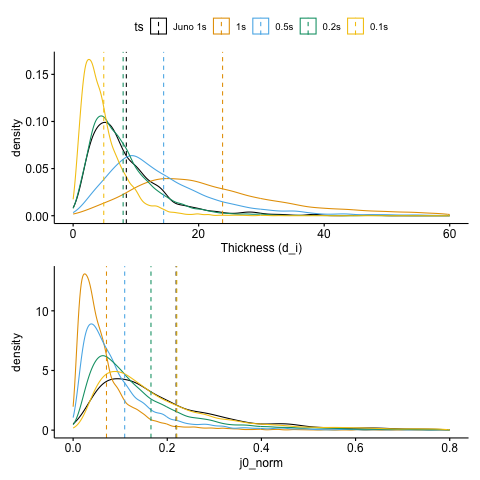

In [6]:
%%R
# sort color with 'JUNO 1s' first
temp_df <- df %>%
  mutate(ts = factor(ts, levels = c("Juno 1s", "1s", "0.5s", "0.2s", "0.1s")))

color <- "ts"
add <- "mean"
common_custom <- scale_color_okabeito(palette = "black_first")

x <- "L_mn"
x_lim <- c(0,7500)
p1 <- ggdensity(temp_df, x = x, color = color, add = add, alpha = 0) + xlim(x_lim) + common_custom

x <- "L_mn_norm"
x_lim <- c(0,60)
x_lab <- "Thickness (d_i)"
p2 <- ggdensity(temp_df, x = x, color = color, add = add, alpha = 0) + xlim(x_lim) + common_custom + labs(x=x_lab)

x <- "j0"
x_lim <- c(0,20)
p3 <- ggdensity(temp_df, x = x, color = color, add = add, alpha = 0) + xlim(x_lim) + common_custom

x <- "j0_norm"
x_lim <- c(0,0.8)
p4 <- ggdensity(temp_df, x = x, color = color, add = add, alpha = 0) + xlim(x_lim) + common_custom

# p1 + p2 + p3 + p4  +
p2 + p4  +
  plot_layout(guides = 'collect', nrow=2) &
  theme(legend.position='top')